Gerando um sistema de avaliacao imobiliaria com machine learn , Regressao linear.
Prever o valor dos imoveis apartir de 3 caracteristicas.Sistma de avaliacao imobiliaria.

# Importando as bibliotecas necessarias.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
dados = pd.read_csv('dataset.csv', sep=';')


In [4]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [5]:
#Observando quantas linahs e colunas de informaçao temos.
dados.shape


(5000, 4)

## Estatísticas descritivas/Analises preliminares

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


In [7]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [8]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


Text(0.5, 1.0, 'Heatmap da Correlação entre Variáveis')

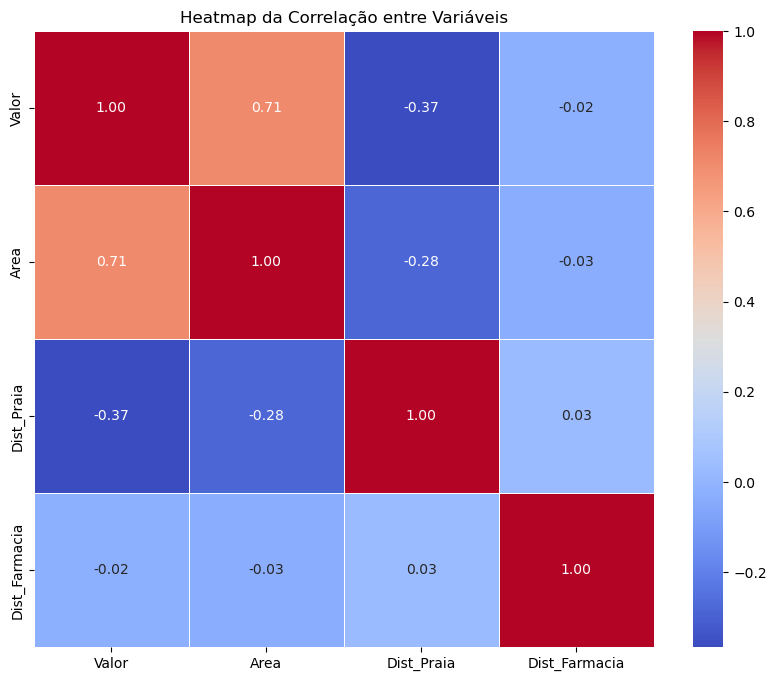

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap da Correlação entre Variáveis')

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

- Configuracao de formatacao dos graficos

In [10]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')  # Define a paleta de cores

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')  # Define o estilo do gráfico

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Reais'>

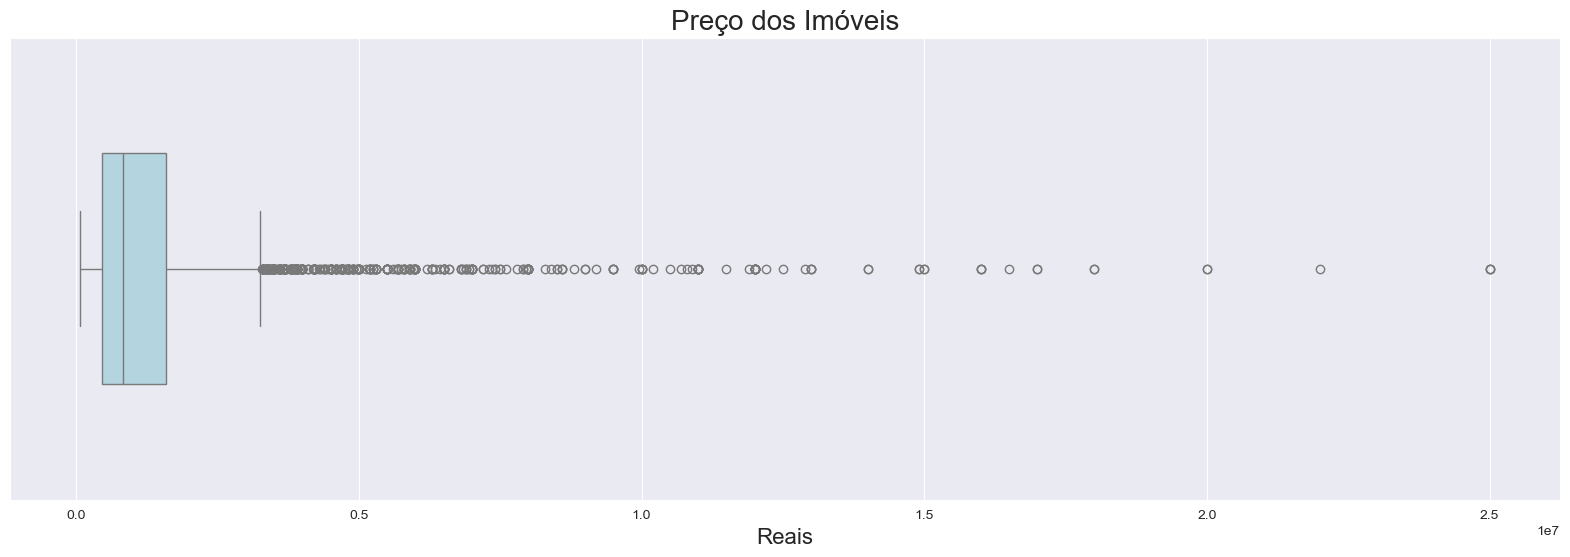

In [11]:
ax = sns.boxplot(data=dados['Valor'], orient='h', width=0.5, color='lightblue')
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

C:\Users\Luis Gustavo\AppData\Local\Temp\ipykernel_4712\1381445337.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

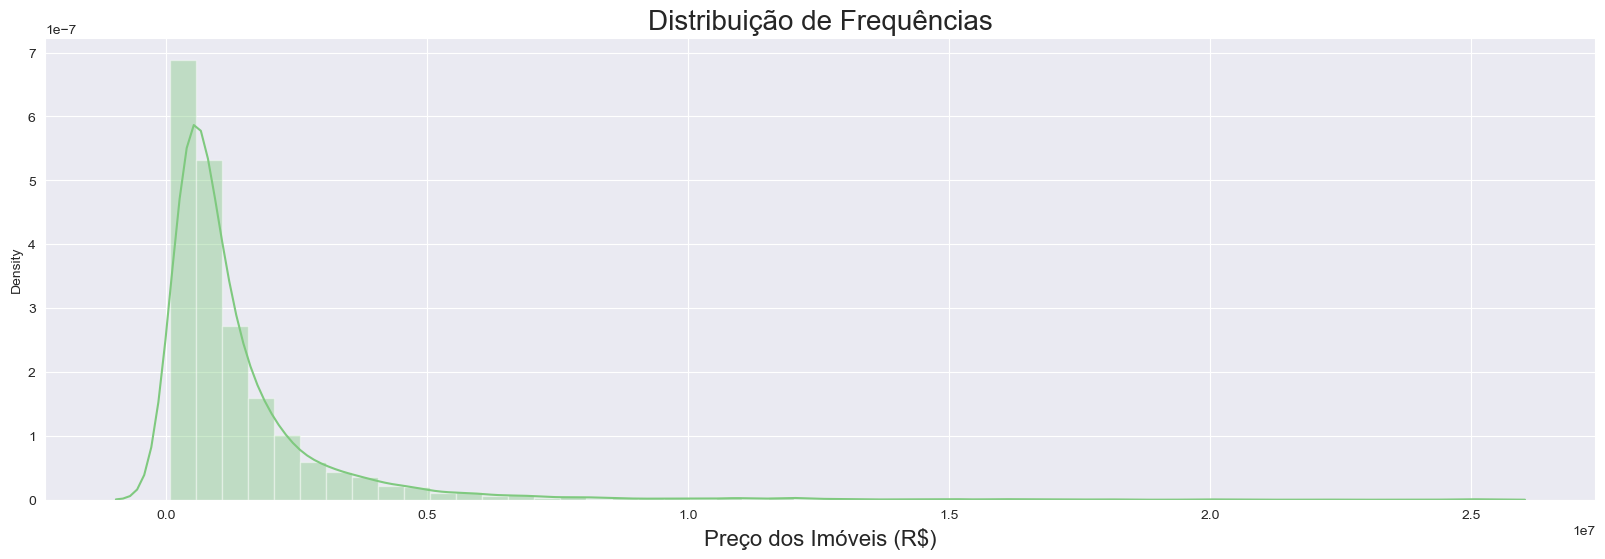

In [12]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

## Percebemos que os dados são assimetricos a direita.

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

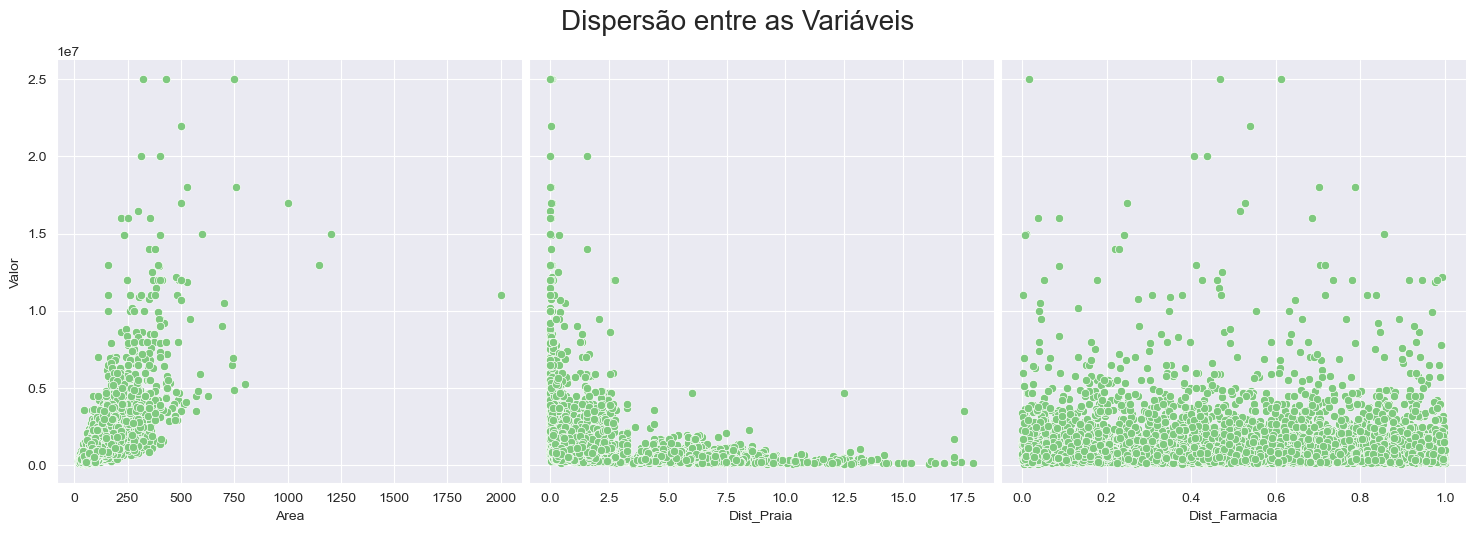

In [13]:
ax= sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

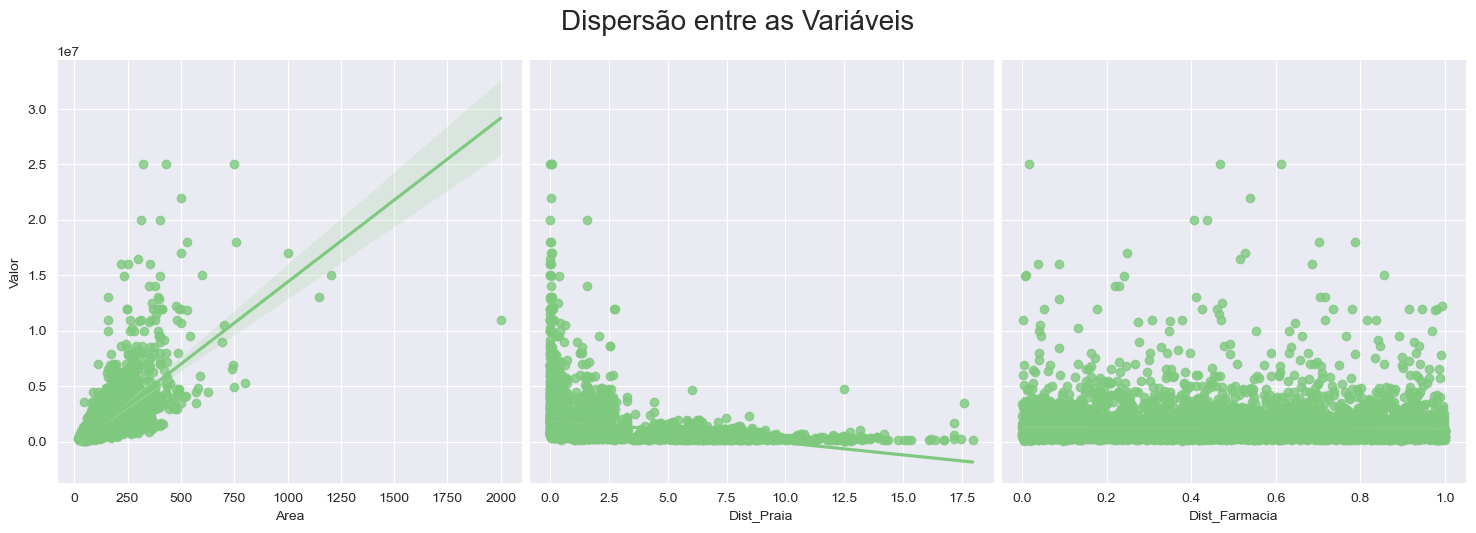

In [14]:
ax= sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'],height=5, kind='reg' )
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Percebemos tambem que os dados nao estao de forma ideal para analise, nao conseguimos traçar uma reta.


# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

In [15]:
#Observando quando aanalisarmos uma variavel que esteja perto de zero, o logaritmo dela vai ser negativo, e quando for zero, o logaritmo dela vai ser infinito.
np.log(0)

C:\Users\Luis Gustavo\AppData\Local\Temp\ipykernel_4712\2652155541.py:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

# Fazendo a transformação dos dados, para tentar chegar a uma simetria na curva.

- Utilizamos a biblioteca numpy.

In [16]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)  # Adicionando 1 para evitar log(0)   
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)


- Como a variável apresenta valores zero em alguns registros, a forma mais correta de transformação é adicionando uma constante, diferente de zero, aos dados, para evitar perda de informação, visto que log(0) não existe.

In [17]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

C:\Users\Luis Gustavo\AppData\Local\Temp\ipykernel_4712\2017948708.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['log_Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

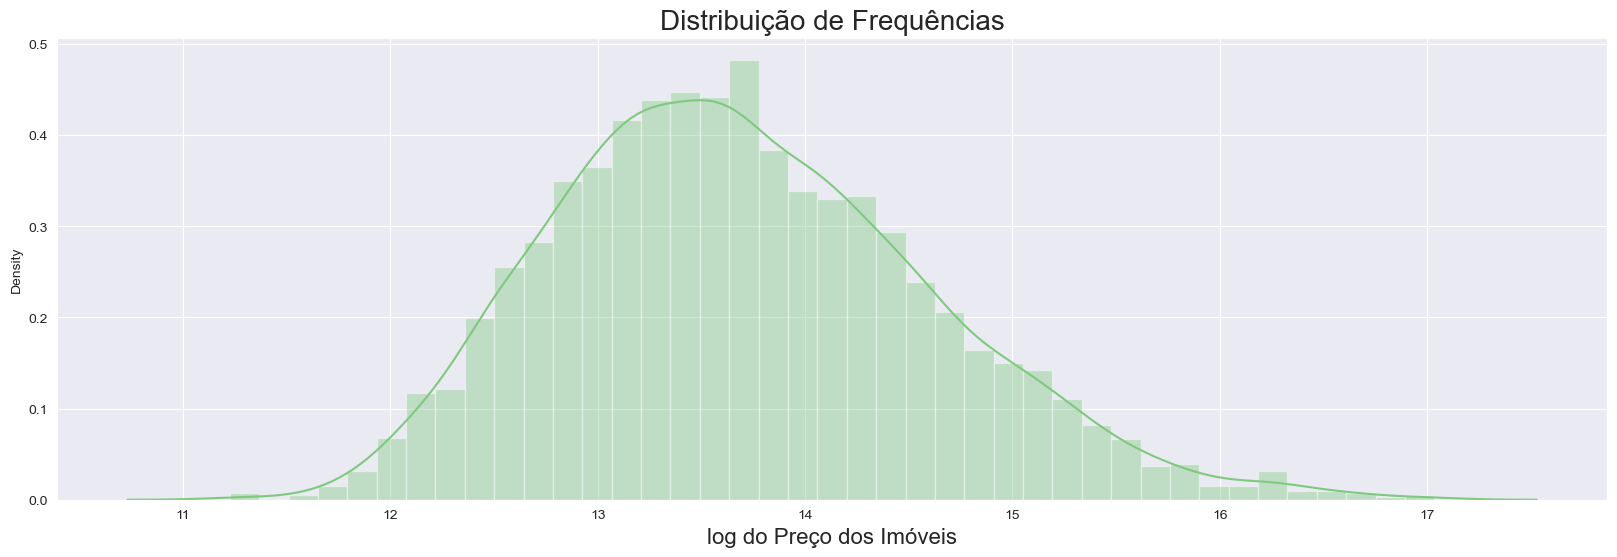

In [18]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

- Percebemos que conseguimos chegar a uma  assimetria  dos dados com a alteraçao feita das variaveis.

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

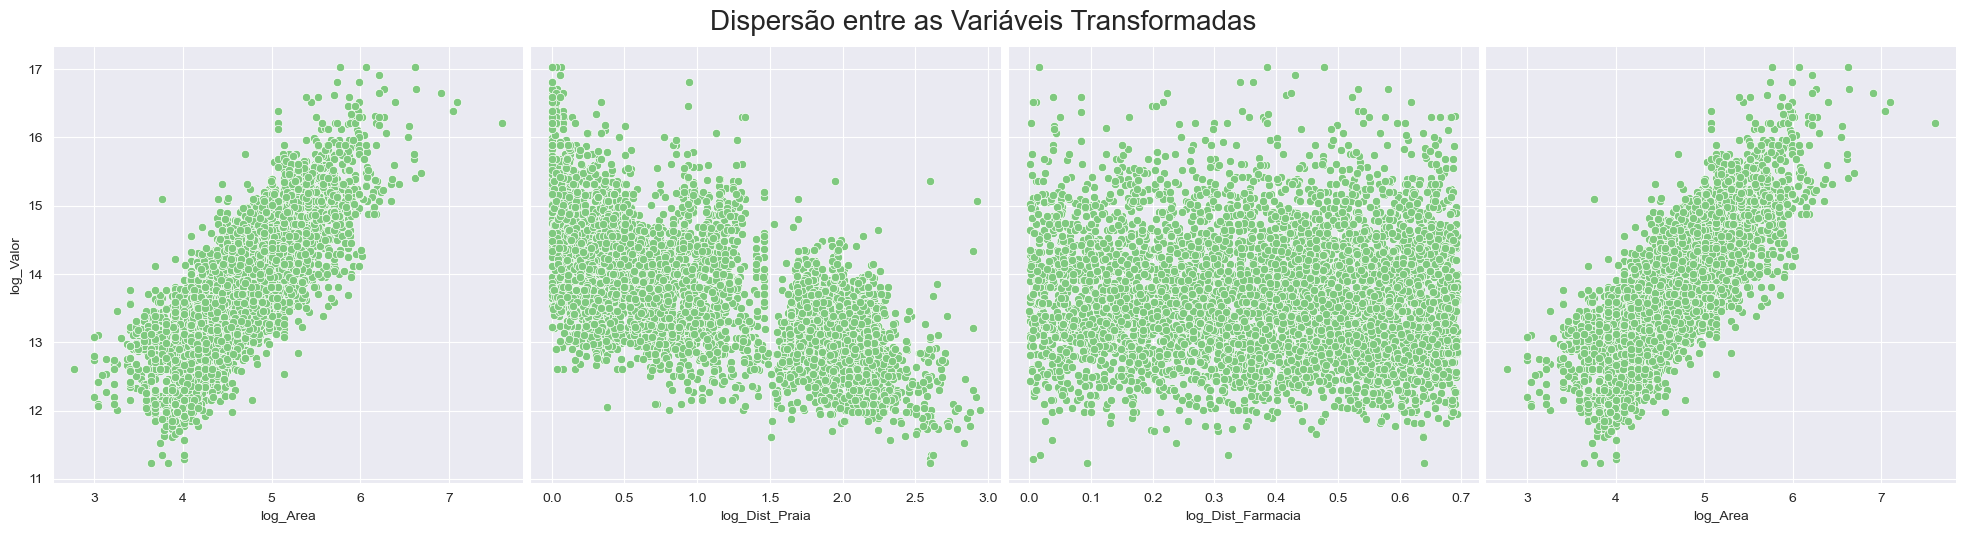

In [19]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia', 'log_Area'], height=5)  
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

- Conseguimos ver que a disperção dos dados estao um pouco melhor, menos a de distancia da farmacia

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [20]:
from sklearn.model_selection import train_test_split

-  Criando uma Series (pandas) para a variável dependente (Alvo).Armazenando os preços dos Imoveis (y)


In [21]:
y = dados['log_Valor']

- Criando um DataFrame (pandas) para armazenar


In [22]:
# Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X). Excluindo a variável dependente (y).
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

- Utilizamos o desempacotamento de tuplas para armazenar os dados em cada variavel desejada.


- A técnica de separação aleatória de um dataset em dois conjuntos distintos (conjuntos de treino e teste), estimar o modelo com os dados de um destes conjuntos (conjunto de treino) e posteriormente realizar estimações com os dados do segundo conjunto (conjunto de teste), é uma técnica bastante utilizada em data science, para confirmar a eficácia dos modelos estimados.

In [23]:
# Criando os Dados para Teste e Treino.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811) #Utilizamos 0.2 que corresponde a 20 por cento dos dados para teste e o restante para treino.

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O scikit-learn é um módulo Python especializado em soluções para machine learning.</p>



## Estimando o modelo com statsmodels

- Estimando o modelo com statsmodels

In [24]:
# Adicionando a constante no teste.
X_train_com_const = sm.add_constant(X_train)


- O statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados.

In [25]:
# Utilizando o minimo de quadrados ordinarios (OLS) para estimar o modelo.(Utilizado para analisar as estatisticas de test)
modelo_statsmodels = sm.OLS(y_train, X_train_com_const, hasconst = True).fit()

# <font color='blue' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>


## Avaliando as estatísticas de teste do modelo

In [26]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:50:15   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [27]:
#Criando um novo X sem o parametro de distancia da farmacia.
X = dados[['log_Area', 'log_Dist_Praia']]

In [28]:
X

,log_Area,log_Dist_Praia
0,5.634790,0.215857
1,5.337538,0.644028
2,5.135798,0.057821
3,4.605170,1.356655
4,5.099866,0.214916
...,...,...
4995,4.248495,0.391608
4996,4.852030,2.261189
4997,4.248495,0.225651
4998,4.007333,2.297093


## Criando os datasets de treino e de teste

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811) #Utilizamos 0.2 que corresponde a 20 por cento dos dados para teste e o restante para treino.

## Estimando o modelo com o statsmodels

In [30]:
X_train_com_const = sm.add_constant(X_train)

In [31]:
#Estimando o novo modelo.
modelo_statsmodels = sm.OLS(y_train, X_train_com_const, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [32]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:50:15   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Instanciando a classe *LinearRegression()*

In [33]:
#Criando o modelo de regressão linear.
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [34]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [35]:
print('R² = {}',(modelo.score(X_test, y_test)))

R² = {} 0.7904430508603386


- Observando o R² do modelo de treino.Atraves do modelo de treino, conseguimos observar o quanto o modelo se ajusta aos dados de treino. 


In [36]:
print('R² = {}'.format(round(modelo.score(X_train, y_train), 3)))


R² = 0.805


## 

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [37]:
# Criando o y_previsto com o modelo treinado.

y_previsto = modelo.predict(X_test)


## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

- Observamos que o R² do modelo de teste esta proximo do R² do modelo de treino, o que indica que o modelo se ajusta bem aos dados de teste. 


In [38]:
print('R² = %s' % round(metrics.r2_score(y_test, y_previsto), 3))

R² = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [39]:
#uTILIZAADNO OS DADOS DE TEST
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

- Prevendo  primeiro registro do modelo.

In [40]:
#Modelo na escala logaritmica.
modelo.predict(entrada)[0]

14.284820061847878

## Invertendo a transformação para obter a estimativa em R$


- Basta fazer a exponenciação do resultado usando o numpy.

In [41]:
np.exp(modelo.predict(entrada)[0])

1598889.7847794362

## Criando um simulador simples

- Criando dados (ficticios) para teste.
- Fazendo a previsão do preço com os dados ficticios, utilizando o modelo criado.

In [42]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('Estimativa de R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

Estimativa de R$ 2777292.84


c:\Users\Luis Gustavo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [43]:
# Obtendo 
modelo.intercept_, modelo.coef_

(9.334916409800332, array([ 1.05807818, -0.49061226]))

- Podemos observar que o intercepto é o logaritmo do valor do imóvel quando as variáveis explicativas são zero.
Portanto, para obter o valor do imóvel, precisamos aplicar a exponenciação ao intercepto.


In [44]:
#Podemos observar que o intercepto é o logaritmo do valor do imóvel quando as variáveis explicativas são zero.
# Portanto, para obter o valor do imóvel, precisamos aplicar a exponenciação ao intercepto.
np.exp(modelo.intercept_)

11326.681428069882

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [45]:
#
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [46]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [47]:
index = ['intercept', 'log_Área', 'log_Distância da Praia']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

- O modelo consta de um intercepto e duas variáveis explicativas:  Área e Distância da Praia.  O intercepto representa o logaritmo do valor do imóvel quando as variáveis explicativas são zero, e os coeficientes indicam a relação entre as variáveis explicativas e o logaritmo do valor do imóvel. O coeficiente de log_Área indica que, para cada aumento percentual na área do imóvel, espera-se um aumento percentual no valor do imóvel, enquanto o coeficiente de log_Distância da Praia indica que, para cada aumento percentual na distância da praia, espera-se uma diminuição percentual no valor do imóvel.

In [48]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros']).round(2)


,Parametros
intercept,9.33
log_Área,1.06
log_Distância da Praia,-0.49


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

- Criando uma varivale para amarzenar a previsao que o modelo realizou.

In [49]:
y_previsto_train = modelo.predict(X_train)


## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

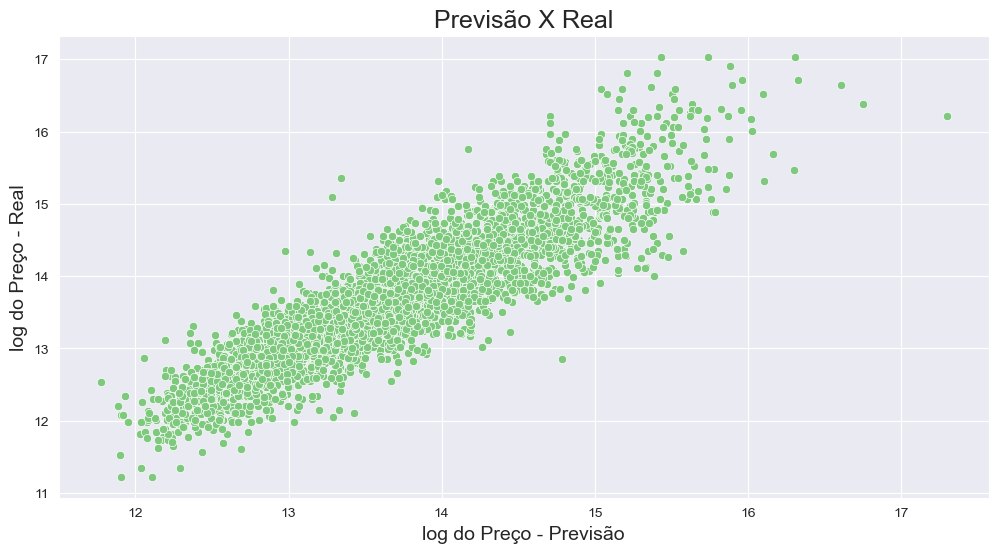

In [50]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

- O residuo é a diferença entre o valor real do imóvel e o valor previsto pelo modelo


In [51]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

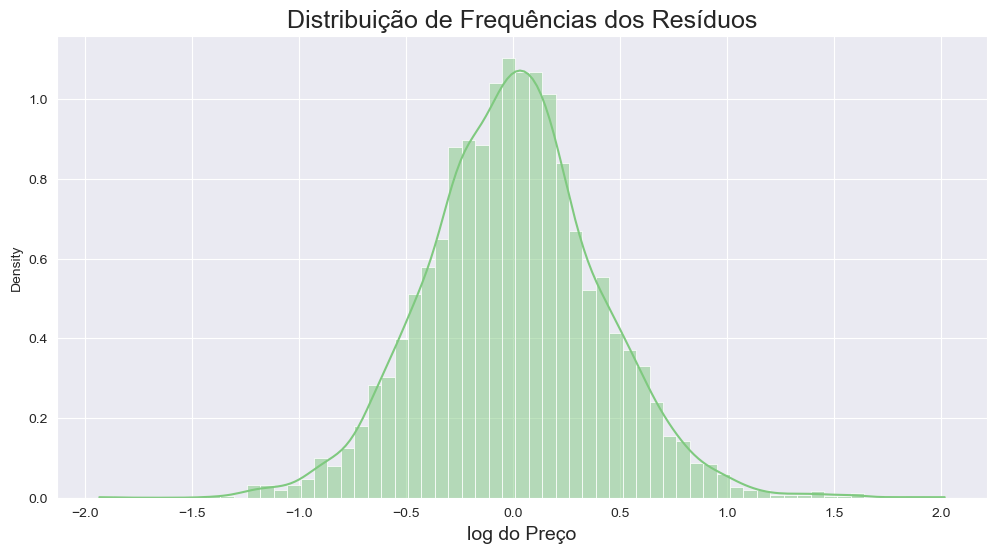

In [52]:
ax = sns.histplot(residuo, kde=True, stat="density")
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
display(ax)

In [53]:
def simular_preco(modelo, area, dist_praia):
    entrada = [[np.log(area), np.log(dist_praia + 1)]]
    preco_log = modelo.predict(entrada)[0]
    preco_real = np.exp(preco_log)
    print(f'Estimativa de preço: R$ {preco_real:.2f}')
    return preco_real
# Exemplo de uso:
simular_preco(modelo, 250, 1)

Estimativa de preço: R$ 2777292.84


c:\Users\Luis Gustavo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2777292.8403123305

In [54]:
#Salvando o modelo para uso posterior.
import joblib
joblib.dump(modelo, 'modelo_regressao.pkl')

['modelo_regressao.pkl']

In [55]:
import pandas as pd
import numpy as np
from flask import Flask, request, jsonify
from sklearn.linear_model import LinearRegression
import joblib

app = Flask(__name__)

# Carregue o modelo treinado e as colunas usadas
modelo = joblib.load('modelo_regressao.pkl')  # Salve seu modelo previamente
colunas = ['log_Area', 'log_Dist_Praia']

def transformar_dados(area, dist_praia):
    return pd.DataFrame([[np.log(area), np.log(dist_praia + 1)]], columns=colunas)

@app.route('/prever', methods=['POST'])
def prever():
    dados = request.json
    area = dados.get('area')
    dist_praia = dados.get('dist_praia')
    if area is None or dist_praia is None:
        return jsonify({'erro': 'Informe area e dist_praia'}), 400
    entrada = transformar_dados(area, dist_praia)
    preco_log = modelo.predict(entrada)[0]
    preco_real = np.exp(preco_log)
    return jsonify({'preco_estimado': round(preco_real, 2)})

@app.route('/cadastrar', methods=['POST'])
def cadastrar():
    dados = request.json
    # Aqui você pode salvar os dados em um banco ou arquivo
    # Exemplo: salvar em um CSV
    novo = pd.DataFrame([dados])
    novo.to_csv('cadastros.csv', mode='a', header=False, index=False)
    return jsonify({'mensagem': 'Cadastro realizado com sucesso!'})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Luis Gustavo\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
